In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

%load_ext google.colab.data_table

In [2]:
df1 = pd.read_csv('https://github.com/Jack12619/Final_CO2/raw/main/primary-energy-renewables.csv')
df2 = pd.read_csv('https://github.com/Jack12619/Final_CO2/raw/main/owid-co2-data.csv')
df3 = pd.read_csv('https://github.com/Jack12619/Final_CO2/raw/main/energy.csv')
df4 = pd.read_csv('https://github.com/Jack12619/Final_CO2/raw/main/levelized-cost-of-energy.csv')

In [3]:
no_countries_filter = 'Europe|EU|World|Asia|Africa|America|Oil|transport|zone|countries'  # filter maken voor df. deze zijn we vaker nodig

In [4]:
#df maken vor vraag 1 
co2_data = df2[['country', 'year','population','gdp', 'co2_per_gdp', 'co2_per_capita', 'consumption_co2_per_gdp','energy_per_capita']]

In [5]:
co2_data = co2_data[(co2_data['year'] >= 1900) & (co2_data['year'] < 2019)]  # we hebben na 2018 geen GDP meer dus die jaren kunnen eruit
co2_data = co2_data.loc[~co2_data.country.str.contains(no_countries_filter)]  # niet-landen eruit filteren

In [6]:
co2_data['GDP_per_capita'] = co2_data['gdp'] / co2_data['population'].copy()  # GDP per capita berekenen

In [7]:
corrsel = co2_data[['GDP_per_capita','co2_per_capita']]  # correlatie tussen GDP en CO2 berkenen
corrsel.corr()  # 0.667 is sterk

,GDP_per_capita,co2_per_capita
GDP_per_capita,1.000000,0.667698
co2_per_capita,0.667698,1.000000


In [8]:
grouped_by_year = co2_data.groupby('year')  # alles per jaar samenvatten

In [9]:
energy_per_capita_data = co2_data[(co2_data['year'] >= 1980) & (co2_data['year'] < 2019)]  # energy per capita is beschikbaar vanaf 1980 dus rest halen we eruit.
energy_per_capita_grouped_by_year = energy_per_capita_data.groupby('year')

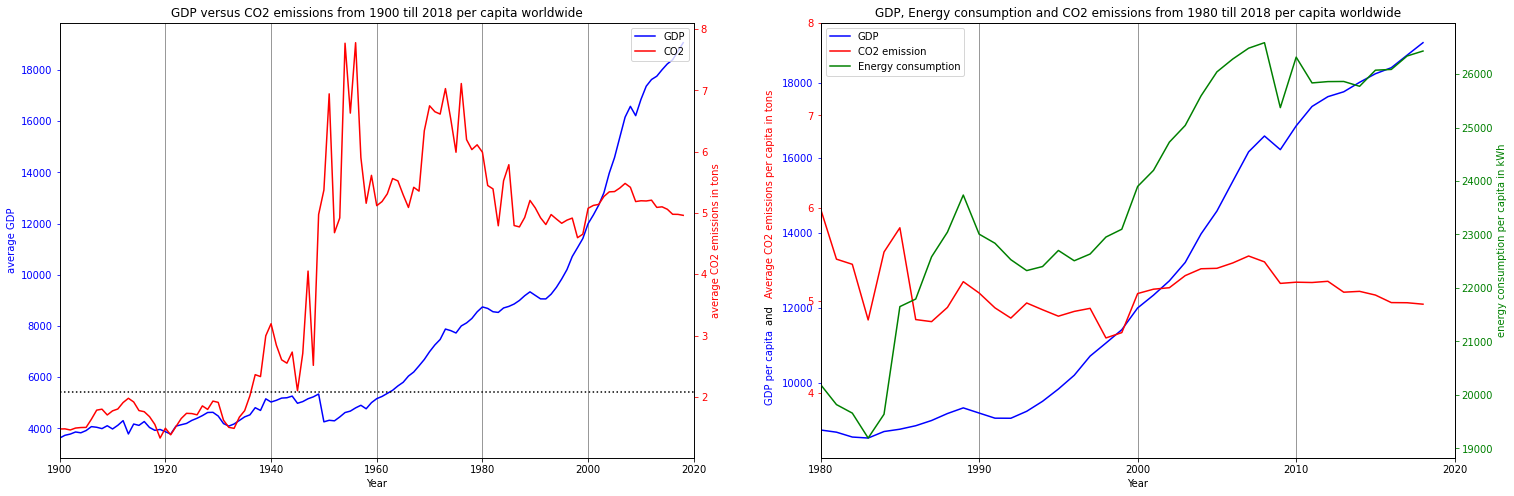

In [10]:
fig,((ax1,ax3)) = plt.subplots(ncols=2, figsize=(25,8))

# data 1e plot
x = sorted(co2_data['year'].unique())
y1 = grouped_by_year['GDP_per_capita'].mean()
y2 = grouped_by_year['co2_per_capita'].mean()

# data 2e plot
x2 = sorted(energy_per_capita_grouped_by_year['year'].unique())
y3 = energy_per_capita_grouped_by_year['GDP_per_capita'].mean()
y4 = energy_per_capita_grouped_by_year['co2_per_capita'].mean()
y5 = energy_per_capita_grouped_by_year['energy_per_capita'].mean()

# 1e plot
ax1.plot(x, y1, c='b', label='GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('average GDP', c='b')
ax1.set_title('GDP versus CO2 emissions from 1900 till 2018 per capita worldwide')
ax1.tick_params(axis='y', colors='b')
ax1.grid(axis='x', c='grey')
ax1.set_xlim(1900, 2020)
ax1.axhline(y=5400 ,c='k', linestyle=':')

ax2 = ax1.twinx() 
ax2.plot(x, y2, c='r', label='CO2')
ax2.set_ylabel('average CO2 emissions in tons', c='r')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)
ax2.tick_params(axis='y', colors='r')

# 2e plot
ax3.plot(x2, y3, c='b',label="GDP")
ax3.set_xlabel("Year")
ax3.set_title('GDP, Energy consumption and CO2 emissions from 1980 till 2018 per capita worldwide')
ax3.tick_params(axis='y', colors='b')
ax3.grid(axis='x', c='grey')
ax3.set_xlim(1980, 2020)
ax3.set_xticks(ticks=[1980,1990,2000,2010,2020])

ax4 = ax3.twinx()
ax4.plot(x2, y4, c='r', label='CO2 emission')
ax4.set_ylim(3.3, 8)
ax4.tick_params(axis='y', colors='r')

ax5 = ax4.twinx()
ax5.plot(x2, y5,  c='g', label="Energy consumption")
ax5.set_ylabel('energy consumption per capita in kWh', c='g')
ax5.tick_params(axis='y', colors='g')
lines, labels = ax3.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
lines3, labels3 = ax5.get_legend_handles_labels()
ax5.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

ybox1 = TextArea('Average CO2 emissions per capita in tons', textprops=dict(color='r', size=10,rotation=90,ha='left',va='bottom'))
ybox2 = TextArea('and ',     textprops=dict(color='k', size=10,rotation=90,ha='left',va='bottom'))
ybox3 = TextArea('GDP per capita', textprops=dict(color='b', size=10,rotation=90,ha='left',va='bottom'))

ybox = VPacker(children=[ybox1, ybox2, ybox3],align='bottom', pad=0, sep=5)

anchored_ybox = AnchoredOffsetbox(loc=10, child=ybox, pad=0., frameon=False, bbox_to_anchor=(-0.08, 0.48), 
                                  bbox_transform=ax3.transAxes, borderpad=0.)

ax5.add_artist(anchored_ybox)
plt.show()

In [11]:
# df maken met verbruik renewables
renewables = df1.drop(columns='Code').copy()
renewables = renewables.rename(columns={'Entity':'country', 'Renewables (TWh - equivalent)' : 'renewables', 'Year': 'year'})
renewables = renewables.loc[~renewables.country.str.contains(no_countries_filter)]
renewables = renewables[(renewables['year'] < 2019)]

In [12]:
# df maken voor GDP
country_gdp = df2[['country','year','gdp']]
country_gdp_65_20 = country_gdp[(country_gdp['year'] >= 1965) & (country_gdp['year'] < 2019)]   # renewales v.a. 1965 gemeten,  na 2018 geen GDP meer
country_gdp_65_20 = country_gdp_65_20.loc[~country_gdp_65_20.country.str.contains(no_countries_filter)] 

In [13]:
# samenvoegen om vervolgens correlatie te kunnen meten en te plotten
gdp_and_renewables = pd.merge(renewables,country_gdp_65_20, on = ['country', 'year'])

In [14]:
# correlatie berekenen
check = gdp_and_renewables[['gdp', 'renewables']]
check.corr()  #0.808 zeer sterke correlatie

,gdp,renewables
gdp,1.000000,0.808716
renewables,0.808716,1.000000


In [15]:
# correlatie per jaar
grouped_renew_and_gdp = gdp_and_renewables.groupby('year')

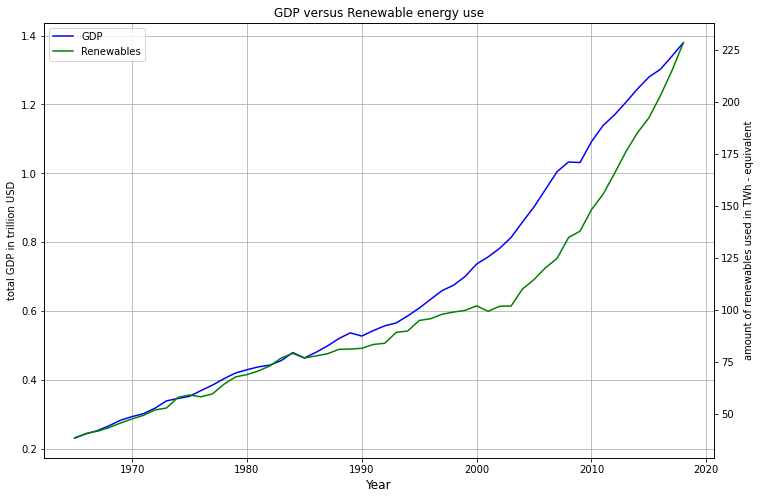

In [16]:
# plot renewables en GDP
fig, ax = plt.subplots(figsize=(12, 8))

x =  grouped_renew_and_gdp['year'].unique()
y1 = (grouped_renew_and_gdp['gdp'].mean() / 1000000000000)
y2 = grouped_renew_and_gdp['renewables'].mean()

ax.plot(x, y1, c='b', label='GDP')
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel('total GDP in trillion USD')
ax.set_title('GDP versus Renewable energy use')
ax.grid()

ax2 = ax.twinx() 
ax2.plot(x, y2, c='g', label='Renewables')
ax2.set_ylabel('amount of renewables used in TWh - equivalent')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

plt.show()

In [17]:
# df maken voor vraag 2
q2 = df2[['country', 'year', 'co2','population']]

In [18]:
# omdat er voor 1990 veel dat mist nemen alleen de data vanaf dat jaar
q2 = q2[q2['year'] >= 1990 ]
q2 = q2.loc[~q2.country.str.contains(no_countries_filter)].copy()

In [19]:
# df maken om de verschillen in uitstoot en populatie te berekenen
data_1990 = q2[q2['year'] == 1990][['country', 'year', 'co2', 'population']]
data_2000 = q2[q2['year'] == 2000][['country', 'year', 'co2', 'population']]
data_2010 = q2[q2['year'] == 2010][['country', 'year', 'co2', 'population']]
data_2020 = q2[q2['year'] == 2020][['country', 'year', 'co2', 'population']]

data_1990_2020 = pd.merge(data_1990, data_2020, on =['country'])
data_1990_2020.rename(columns={'co2_x' : 'co2_1990', 'co2_y' : 'co2_2020', 
                               'population_x' : 'population_1990',  'population_y' : 'population_2020'
                               }, inplace=True)
data_1990_2020.drop(columns=['year_x', 'year_y'], inplace=True)


data_1990_2020  = pd.merge(data_1990_2020 , data_2010, on =['country'])
data_1990_2020.rename(columns={'co2' : 'co2_2010','population' : 'population_2010'}, inplace=True)
data_1990_2020.drop(columns=['year'], inplace=True)

data_1990_2020 = pd.merge(data_1990_2020, data_2000, on =['country'])
data_1990_2020.rename(columns={'co2' : 'co2_2000','population' : 'population_2000'}, inplace=True)
data_1990_2020.drop(columns=['year'], inplace=True)

data_1990_2020.set_index('country', inplace=True)

data_1990_2020 = data_1990_2020[['co2_1990', 'co2_2000', 'co2_2010', 'co2_2020','population_1990',
                                 'population_2000', 'population_2010','population_2020']].copy()
data_1990_2020.dropna(how="all")

,co2_1990,co2_2000,co2_2010,co2_2020,population_1990,population_2000,population_2010,population_2020
country,,,,,,,,
Afghanistan,2.603,0.758,8.398,12.160,12412311.0,20779957.0,29185511.0,38928341.0
Albania,5.445,3.004,4.448,4.535,3286070.0,3129246.0,2948029.0,2877800.0
Algeria,76.738,82.221,117.813,154.995,25758872.0,31042238.0,35977451.0,43851043.0
Andorra,0.407,0.524,0.517,0.466,54508.0,65390.0,84454.0,77265.0
Angola,5.090,9.516,28.865,22.198,11848385.0,16395476.0,23356247.0,32866267.0
...,...,...,...,...,...,...,...,...
Venezuela,121.823,151.870,184.084,84.609,19632665.0,24192449.0,28439942.0,28435943.0
Vietnam,21.299,52.601,138.585,254.303,67988855.0,79910411.0,87967655.0,97338583.0
Yemen,9.520,14.475,23.151,9.768,11709987.0,17409071.0,23154854.0,29825968.0


In [ ]:
# df voor populatie
pop_data = data_1990_2020[['population_1990', 'population_2000', 'population_2010','population_2020']]
pop_data.dropna(how='any', inplace=True)

In [ ]:
pop_data['change_1990_2020'] = pop_data['population_2020'] / pop_data['population_1990'] * 100  # relatieve groei berekenen
pop_data.change_1990_2020.describe() # gem is 163% groei. 

In [22]:
# originele df aanpassen - Pop data 
data_1990_2020 = data_1990_2020[data_1990_2020['population_2020'] > 50000 ].copy()  # alleen landen met > 50k inwoners
data_1990_2020['population_change_1990_2020'] = data_1990_2020 ['population_2020'] / data_1990_2020['population_1990'] * 100   # relatieve groei berekenen
data_1990_2020 = data_1990_2020[(data_1990_2020['population_change_1990_2020'] < 300) & (data_1990_2020['population_change_1990_2020'] > 70)]  # landen met meer dan 300% groei en minder dan 70% groei eruit filteren
data_1990_2020.drop(columns=['population_1990', 'population_2000', 'population_2010','population_2020'], inplace=True)  # onnodige kolommen eruit

In [23]:
# df maken voor co2
co2_data = data_1990_2020[['co2_1990', 'co2_2000', 'co2_2010', 'co2_2020']].copy()
co2_data.dropna(how='any', inplace=True)

In [24]:
# verschil berekenen
co2_data['change_1990_1990'] = co2_data['co2_1990'] /  co2_data['co2_1990'] * 100
co2_data['change_1990_2000'] = co2_data['co2_2000'] /  co2_data['co2_1990'] * 100
co2_data['change_1990_2010'] = co2_data['co2_2010'] /  co2_data['co2_1990'] * 100
co2_data['change_1990_2020'] = co2_data['co2_2020'] /  co2_data['co2_1990'] * 100

In [25]:
# top 10 
co2_top10 = co2_data.sort_values(by='change_1990_2020').head(10)  # dit zijn allemaal landen met +5 Ton uitstoot in 2020

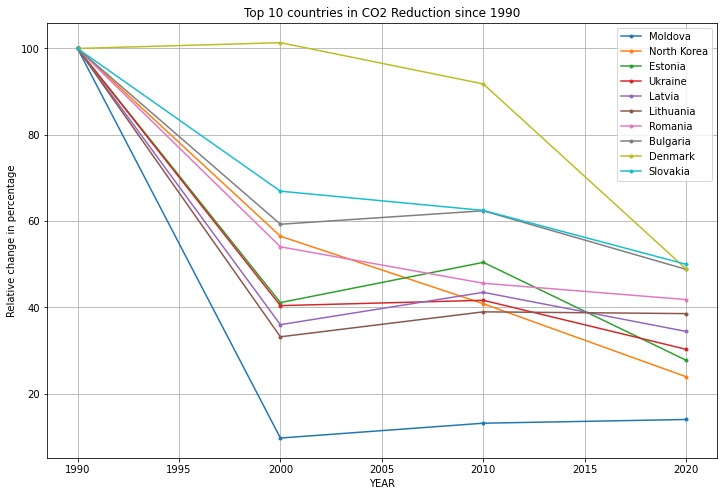

In [26]:
fig,ax = plt.subplots(figsize=(12,8))

x = [1990, 2000, 2010, 2020]
y = [co2_top10['change_1990_1990'], co2_top10['change_1990_2000'], co2_top10['change_1990_2010'], co2_top10['change_1990_2020']]
labels= co2_top10.index

ax.plot(x,y, marker='.')
ax.set_xlabel("YEAR")
ax.set_ylabel("Relative change in percentage")
ax.set_title("Top 10 countries in CO2 Reduction since 1990")
ax.grid()
ax.legend(labels)

plt.show()

In [27]:
# df maken voor vraag 3 
world_energy = df4[df4['Entity'] == 'World'].copy()
world_energy.columns =  ['country', 'code', 'year', 'csp', 'hydro', 'solar', 'onshore_wind', 'bio', 'geothermal', 'offshore_wind']
world_energy.drop(columns=['code', 'csp', 'country'], inplace=True)
world_energy = world_energy.sort_values(by='year')

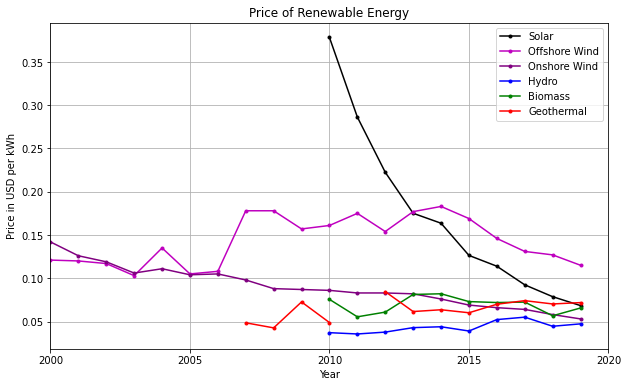

In [28]:
# plotting all
fig,ax = plt.subplots(figsize=(10,6))

temp_data =  world_energy.copy()
all_years = list(range(1983,2036))
temp_x = temp_data['year'].values

temp_y1 = temp_data.solar.values
temp_y2 = temp_data.onshore_wind.values
temp_y3 = temp_data.hydro.values
temp_y4 = temp_data.bio.values
temp_y5 = temp_data.geothermal.values
temp_y6 = temp_data.offshore_wind.values

ax.plot(temp_x, temp_y1, c= 'k', marker='.', label='Solar')
ax.plot(temp_x, temp_y6, c= 'm', marker='.', label='Offshore Wind')
ax.plot(temp_x, temp_y2, c= 'purple', marker='.', label='Onshore Wind')
ax.plot(temp_x, temp_y3, c= 'b', marker='.', label='Hydro')
ax.plot(temp_x, temp_y4, c= 'g', marker='.', label='Biomass')
ax.plot(temp_x, temp_y5, c= 'r', marker='.', label='Geothermal')

ax.set_xlim(2000, 2020)
ax.set_xticks([2000, 2005, 2010, 2015, 2020])
ax.set_xlabel('Year')
ax.set_ylabel('Price in USD per kWh')
ax.set_title('Price of Renewable Energy')
plt.grid()
ax.legend()


plt.show()


In [29]:
# ipv voor elk type energy een plot te maken, maak ik een functie waar enkel de kolomnaam als input hoeft. 
def plot_regression(kolom):
  temp_data =  world_energy[['year', f'{kolom}']].copy()
  temp_data.dropna(how='any', inplace=True)
  temp_x = temp_data['year'].values
  temp_y = temp_data[f'{kolom}'].values

  len_years = 2020 - len(temp_x)
  all_years = list(range(len_years,2036)) # maak een lijst van jaren
  
  fig,ax = plt.subplots(figsize= (6, 3))
  ax.plot(temp_x, temp_y, marker='.', label=f'{kolom}'' price')  # plotten
  
  try:            # lineare progressie lijn toevoegen
    coefs = poly.polyfit(temp_x, temp_y, 1)
    ffit = poly.polyval(all_years, coefs)
    ax.plot(all_years, ffit, label='linear progression')
  except ValueError as error:
    print(f"Could not plot linear regression line because:{error}")

  
  ax.set_xlabel('Year')
  ax.set_ylabel('Price in US$ per kilowatt-hour')
  ax.set_title('Price expectation for ' f'{kolom}' ' energy')
  ax.grid()
  ax.legend()
  ax.set_ylim(0)
  
  plt.show()

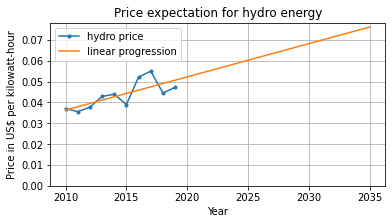

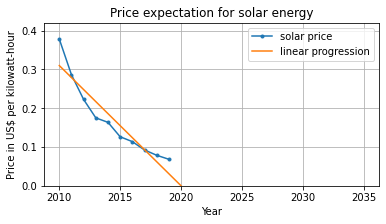

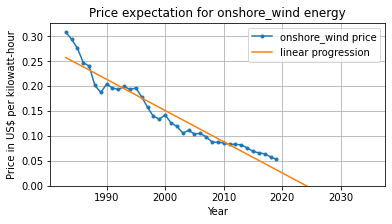

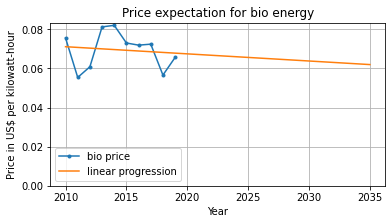

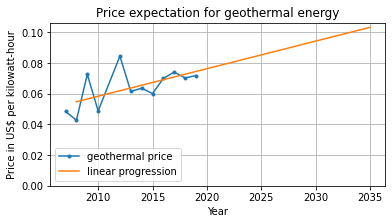

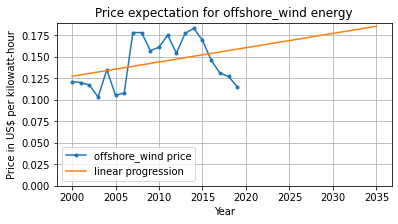

In [30]:
plot_regression('hydro')
plot_regression('solar')
plot_regression('onshore_wind')
plot_regression('bio')
plot_regression('geothermal')
plot_regression('offshore_wind')